<a href="https://colab.research.google.com/github/vedith12/ML-tasks/blob/main/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING ASSIGNMENT - I**

dataset used :
1. breast_cancer
2. UCI Wine Quality

# **Question 1 Regression**

For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.

### (a) Load the data into memory. Make an appropriate X matrix and y vector.

In [ ]:
#all imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

#loading the data
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Data shape: {X.shape}, Target shape: {y.shape}")


Data shape: (569, 30), Target shape: (569,)


### (b) Split the data at random into one set (X_train, y_train) containing 80% of the instances, which will be used for training + validation, and a testing set (X_test, y_test) (containing remaining instances).

In [ ]:
# Split data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (455, 30), Test: (114, 30)


### (c) Give the objective of logistic regression with L2 regularization.

Logistic regression is used to predict the probability that an input belongs to class 1. It uses the sigmoid function:
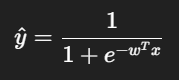



To train the model, we minimize the cross-entropy loss (also called log-loss), which measures how well the predicted probabilities match the actual labels. It is defined as:


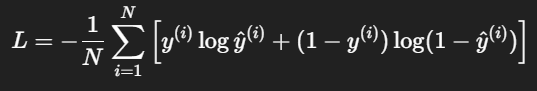


* If the true label is 1, the loss is small only when the predicted probability is close to 1.

* If the true label is 0, the loss is small only when the predicted probability is close to 0.

* Wrong predictions with high confidence are punished heavily, while correct confident predictions give very low loss.
To prevent overfitting, we add an L2 regularization penalty on the weights:


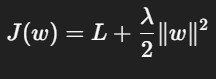


The first term, cross-entropy, ensures that the model makes accurate predictions, while the second term, regularization, discourages the weights from becoming too large. The regularization parameter
λ controls the balance between these two objectives: when
λ is small, the model remains flexible but risks overfitting to the training data, and when λ is large, the model becomes simpler but may underfit, failing to capture important patterns.

In short, logistic regression with L2 regularization tries to predict correctly while keeping weights small, which improves generalization to new data.

### (d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.

As the regularization parameter
λ increases, the model’s behavior changes significantly. With very small
λ, the model fits the training data extremely well but risks overfitting. As
λ grows, the weights shrink, training loss rises, but test loss initially improves before also increasing due to underfitting. Accuracy shows the same trend: high on training for small
λ, but generalization improves around moderate values of
λ.

In [ ]:
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_loss, test_loss = [], []
train_acc, test_acc = [], []
w_norms, weights = [], []

for lam in lambdas:
    C_val = 1e12 if lam == 0 else 1/lam
    clf = LogisticRegression(penalty="l2", C=C_val, solver="liblinear", max_iter=2000)
    clf.fit(X_train, y_train)

    # probabilities
    p_tr = clf.predict_proba(X_train)[:, 1]
    p_te = clf.predict_proba(X_test)[:, 1]

    # metrics
    train_loss.append(log_loss(y_train, p_tr))
    test_loss.append(log_loss(y_test, p_te))
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

    # store weights and norms
    w = clf.coef_.flatten()
    weights.append(w)
    w_norms.append(np.linalg.norm(w))

weights = np.vstack(weights)


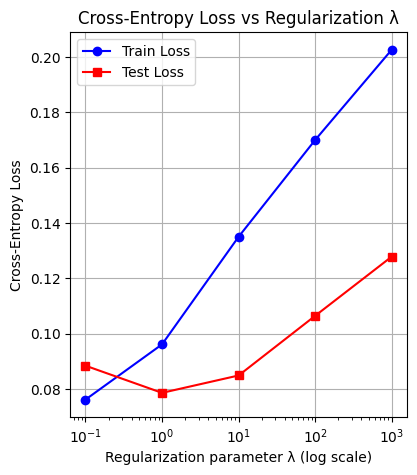

In [ ]:
plt.figure(figsize=(20, 5))

# 1) Cross-Entropy Loss vs Lambda
plt.subplot(1, 4, 1)
plt.semilogx(lambdas[1:], train_loss[1:], 'b-o', label='Train Loss')
plt.semilogx(lambdas[1:], test_loss[1:], 'r-s', label='Test Loss')
plt.xlabel('Regularization parameter λ (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs Regularization λ')
plt.legend()
plt.grid(True)


**1) Cross-Entropy Loss vs λ**

**Observation:** Training loss increases steadily as
λ grows, while test loss decreases slightly at first (better generalization), then rises again at large
λ.

**Explanation:** Small λ (weak regularization) → the model overfits, with very low training loss but higher test loss. Moderate λ balances bias-variance tradeoff, giving better test performance. Very large λ forces the model to be too simple, increasing both train and test loss (underfitting).

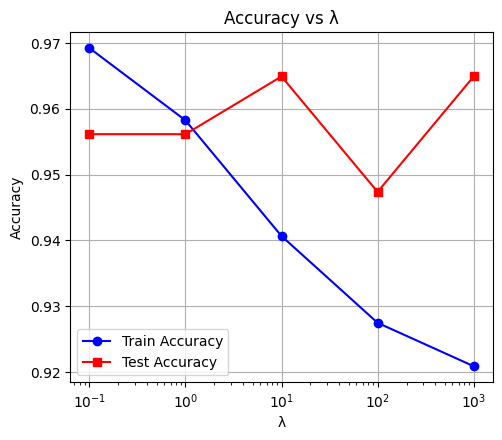

In [ ]:
plt.figure(figsize=(12, 10))
#accuracy vs lambda
plt.subplot(2, 2, 2)
plt.semilogx(lambdas[1:], train_acc[1:], 'b-o', label='Train Accuracy')
plt.semilogx(lambdas[1:], test_acc[1:], 'r-s', label='Test Accuracy')
plt.xlabel('λ')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.legend()
plt.grid(True)


**2) Accuracy vs λ**

**Observation:** Training accuracy is highest at very small
λ and drops as
λ increases. Test accuracy stays relatively stable but peaks around moderate
λ, then decreases for very large
λ.

**Explanation:** Weak regularization gives the model high training accuracy but slightly lower test accuracy (overfitting). With moderate regularization, test accuracy improves because the model generalizes better. At very large
λ, underfitting occurs, reducing accuracy across both sets.

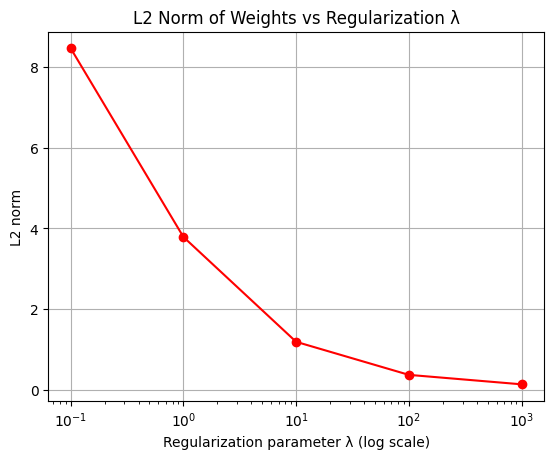

In [ ]:
# 3) L2 Norm of Weights vs Lambda
plt.semilogx(lambdas[1:], w_norms[1:], 'o-', color='red')
plt.xlabel('Regularization parameter λ (log scale)')
plt.ylabel('L2 norm')
plt.title('L2 Norm of Weights vs Regularization λ')
plt.grid(True)

**3) L2 Norm of Weights vs λ**

**Observation:** The norm of the weight vector decreases sharply as
λ increases.

**Explanation:** Regularization penalizes large weights. A small
λ allows large coefficients, while large
λ strongly constrains them, shrinking weights close to zero. This demonstrates how L2 regularization controls model complexity.

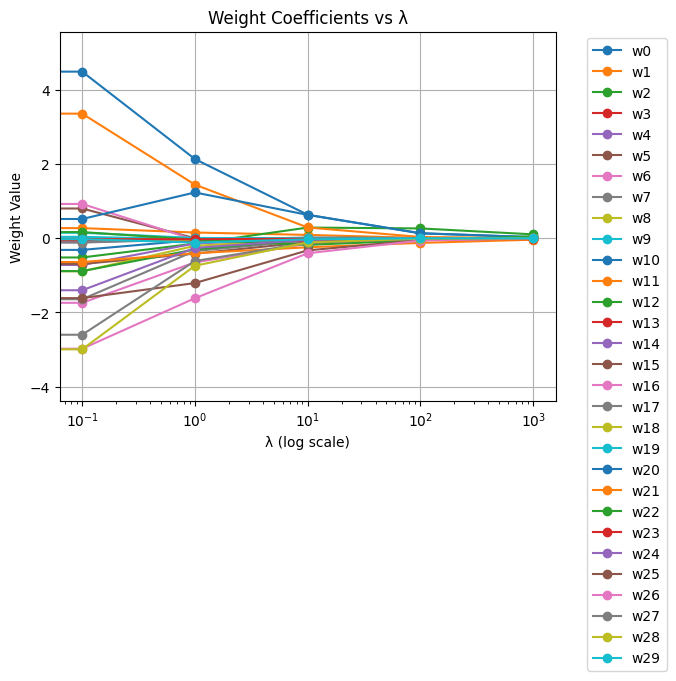

In [ ]:
#4) Weights vs Lambda
plt.figure()
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], 'o-', label=f'w{i}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weight Coefficients vs λ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**4) Weight Coefficients vs λ**

**Observation:** At very small
λ, many coefficients take large positive or negative values. As
λ increases, the weights shrink toward zero and become more stable.

**Explanation:** With weak regularization, the model relies heavily on some features (possibly noise). With stronger regularization, the coefficients are reduced, reducing variance and overfitting. Very strong regularization nearly eliminates feature effects (underfitting).

### (e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [ ]:
import numpy as np

def simple_gaussian_basis(X, centers=None, sigma=1.0, normalize=True):
    """
    Transform input features into Gaussian basis features with optional normalization.

    Parameters:
    - X: ndarray of shape (n_samples, n_features)
    - centers: array of centers for Gaussian functions (default 5 evenly spaced from -10 to 10)
    - sigma: standard deviation for Gaussian functions
    - normalize: whether to standardize each feature before transformation

    Returns:
    - Transformed feature matrix of shape (n_samples, n_features * n_centers)
    """
    n_samples, n_features = X.shape

    if centers is None:
        centers = np.linspace(-10, 10, 5)

    transformed_list = []

    for i in range(n_features):
        col = X[:, i].reshape(-1, 1)

        if normalize:
            col_mean = col.mean()
            col_std = col.std()
            if col_std > 0:
                col = (col - col_mean) / col_std

        # Compute Gaussian basis for all centers at once (vectorized)
        gaussian_cols = np.exp(-((col - centers.reshape(1, -1)) ** 2) / (2 * sigma**2))
        transformed_list.append(gaussian_cols)

    X_transformed = np.hstack(transformed_list)
    return X_transformed

# Example usage
sigmas = [0.1, 0.5, 1, 5, 10]
for sigma in sigmas:
    X_train_transformed = simple_gaussian_basis(X_train, sigma=sigma)
    X_test_transformed = simple_gaussian_basis(X_test, sigma=sigma)
    print(f"Sigma={sigma}: X_train shape {X_train.shape} -> {X_train_transformed.shape}")


Sigma=0.1: X_train shape (455, 30) -> (455, 150)
Sigma=0.5: X_train shape (455, 30) -> (455, 150)
Sigma=1: X_train shape (455, 30) -> (455, 150)
Sigma=5: X_train shape (455, 30) -> (455, 150)
Sigma=10: X_train shape (455, 30) -> (455, 150)


When we apply Gaussian basis functions with different values of σ, we change how “localized” the new features are:

**Small σ** (e.g., 0.1, 0.5):
The basis functions are very narrow, meaning each one responds strongly only to inputs near its center. This makes the model very flexible, able to capture fine details of the training data.

* **Result:** Very low training error but higher test error -> overfitting (low bias, high variance).

**Moderate σ** (around 1 or 5):
The basis functions are smoother, overlapping more across the input space. This allows the model to capture general patterns without fitting noise.

* **Result:** Balanced training and testing errors -> best generalization (bias-variance tradeoff is optimal).

**Large σ** (e.g., 10):
The basis functions are very wide and flat, so they lose the ability to capture local variations. The model becomes too simple.

* **Result:** Training and testing errors both increase -> underfitting (high bias, low variance).

### (f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off

In this question, we replaced the original features with Gaussian basis functions and varied the width parameter
σ. We then trained logistic regression without regularization and measured the cross-entropy loss on both training and testing sets.

* Small σ (e.g., 0.1, 0.5):
The basis functions are very narrow and capture fine details of the training data. This gives very low training error but higher test error, showing overfitting (low bias, high variance).

* Moderate σ (around 1 or 5):
The basis functions overlap more smoothly, capturing general patterns. Here, both training and testing errors are relatively low, giving the best generalization.

* Large σ (e.g., 10):
The basis functions are very wide and lose the ability to model local variations. Both training and testing errors increase, indicating underfitting (high bias, low variance).

The baseline errors (from part c, without Gaussian basis functions) were plotted as dashed lines for comparison. The Gaussian basis improves performance for some values of σ, but if σ is too small or too large, performance degrades due to overfitting or underfitting.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

train_logloss = []
test_logloss = []

for sigma in sigmas:
    # Transform features
    X_train_gb = simple_gaussian_basis(X_train, sigma=sigma, normalize=True)
    X_test_gb = simple_gaussian_basis(X_test, sigma=sigma, normalize=True)

    # Logistic regression without regularization
    clf = LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000)
    clf.fit(X_train_gb, y_train)

    # Compute log-loss
    train_pred = clf.predict_proba(X_train_gb)[:, 1]
    test_pred = clf.predict_proba(X_test_gb)[:, 1]

    train_logloss.append(log_loss(y_train, train_pred))
    test_logloss.append(log_loss(y_test, test_pred))

# Print results
for i, sigma in enumerate(sigmas):
    print(f"Sigma={sigma}: Train log-loss={train_logloss[i]:.4f}, Test log-loss={test_logloss[i]:.4f}")


Sigma=0.1: Train log-loss=0.5766, Test log-loss=0.6856
Sigma=0.5: Train log-loss=0.3820, Test log-loss=0.6894
Sigma=1: Train log-loss=0.1018, Test log-loss=1.9895
Sigma=5: Train log-loss=0.0009, Test log-loss=0.3380
Sigma=10: Train log-loss=0.0003, Test log-loss=1.5847


Baseline model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Train logistic regression on original features (no Gaussian basis)
baseline_clf = LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000)
baseline_clf.fit(X_train, y_train)

# Compute log-loss on training and testing sets
baseline_train_err = log_loss(y_train, baseline_clf.predict_proba(X_train)[:, 1])
baseline_test_err = log_loss(y_test, baseline_clf.predict_proba(X_test)[:, 1])

print(f"Baseline Train log-loss: {baseline_train_err:.4f}")
print(f"Baseline Test log-loss: {baseline_test_err:.4f}")


Baseline Train log-loss: 0.0002
Baseline Test log-loss: 1.9963


Plotting

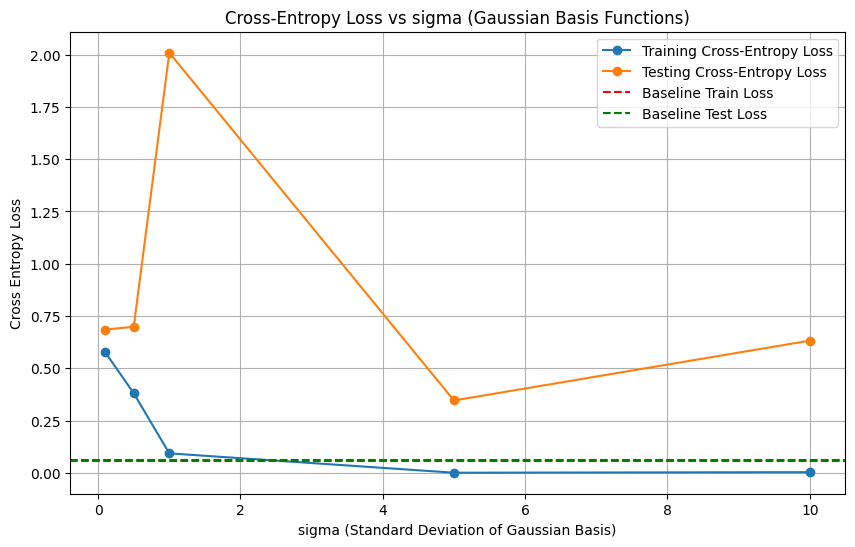

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(sigmas, train_logloss, marker='o', label='Training Cross-Entropy Loss')
plt.plot(sigmas, test_logloss, marker='o', label='Testing Cross-Entropy Loss')

# Baseline cross-entropy errors (from part c)
plt.axhline(y=baseline_train_err, color='red', linestyle='--', label='Baseline Train Loss')
plt.axhline(y=baseline_test_err, color='green', linestyle='--', label='Baseline Test Loss')

plt.title('Cross-Entropy Loss vs sigma (Gaussian Basis Functions)')
plt.xlabel('sigma (Standard Deviation of Gaussian Basis)')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.grid(True)
plt.show()


**Observation and Analysis**

- The plot shows how the **training and testing cross-entropy loss** change as the Gaussian basis function width (σ) varies.
- **For small σ values (0.1, 0.5)**, both training and testing loss are moderate, but testing loss quickly spikes for σ=1, indicating strong overfitting low train loss, but high test loss.
- **For larger σ (5, 10)**, training loss remains very low, but testing loss decreases from the spike and then rises again, staying above the baseline test loss, suggesting increasing bias (underfitting).
- The **baseline loss lines** (from plain logistic regression) are lower than almost all basis function cases, meaning the original data model generalized best.
- **Conclusion:** The best generalization occurs when σ is not too small or too large. Extremely low or high σ leads to overfitting or underfitting, demonstrating the bias-variance trade-off. The Gaussian basis transformation did not outperform the standard logistic regression for this dataset.

### (g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian basis functions
def gaussian_basis(X, sigma):
    n, d = X.shape
    features = []
    for j in range(d):
        means = np.linspace(-10, 10, 5)   # 5 basis functions
        for mu in means:
            features.append(np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2)))
    return np.column_stack(features)

sigmas = [0.1, 0.5, 1, 5, 10]
X_train_basis = [gaussian_basis(X_train, s) for s in sigmas]
X_test_basis = [gaussian_basis(X_test, s) for s in sigmas]

# Concatenate all sigma features
X_train_all = np.hstack(X_train_basis)
X_test_all = np.hstack(X_test_basis)

# Trying different lambda values
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

train_errors = []
test_errors = []
weight_norms = []
sigma_weight_norms = {s: [] for s in sigmas}

for lam in lambdas:
    C = 1/lam if lam > 0 else 1e6  # sklearn uses C = 1/lambda
    model = LogisticRegression(penalty="l2", C=C, solver="lbfgs", max_iter=500)
    model.fit(X_train_all, y_train)

    # Cross-entropy loss (log loss)
    from sklearn.metrics import log_loss
    train_errors.append(log_loss(y_train, model.predict_proba(X_train_all)))
    test_errors.append(log_loss(y_test, model.predict_proba(X_test_all)))

    # Weight norms
    w = model.coef_[0]
    weight_norms.append(np.linalg.norm(w))

    # Norms per sigma group
    split_sizes = [X_train_basis[i].shape[1] for i in range(len(sigmas))]
    start = 0
    for i in range(len(sigmas)):
        size = split_sizes[i]
        s = sigmas[i]
        sigma_weight_norms[s].append(np.linalg.norm(w[start:start+size]))
        start += size

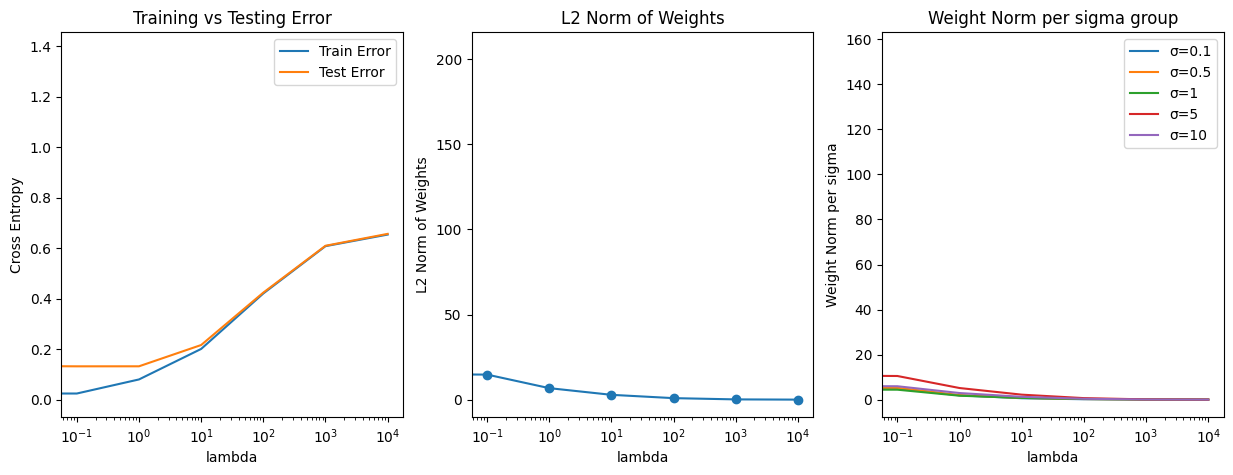

In [ ]:
# plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(lambdas, train_errors, label="Train Error")
plt.plot(lambdas, test_errors, label="Test Error")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("Cross Entropy")
plt.legend()
plt.title("Training vs Testing Error")

plt.subplot(1, 3, 2)
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("L2 Norm of Weights")
plt.title("L2 Norm of Weights")

plt.subplot(1, 3, 3)
for s in sigmas:
    plt.plot(lambdas, sigma_weight_norms[s], label=f"σ={s}")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("Weight Norm per sigma")
plt.legend()
plt.title("Weight Norm per sigma group")

plt.show()


### (h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).

In the earlier parts, Gaussian basis functions were applied independently to each feature.
This means we only transformed each variable on its own, without looking at interactions between them.

But in real data (like medical or financial data), features may work together to influence the output.
For example : In breast cancer data, the combination of mean radius and mean texture might be more informative than either feature alone.

To capture these relationships, we can use multivariate Gaussian basis functions, which depend on multiple input variables:

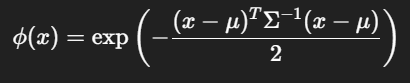


Here, μ is the center vector, and Σ is the covariance matrix that defines the shape of the Gaussian.

Impact on bias-variance tradeoff:

* Using multivariate basis functions makes the model more flexible (lower bias).

* But it also increases the number of parameters and risk of overfitting (higher variance).

* Regularization becomes crucial to control this added complexity.

In short, to capture feature relationships, we need multivariate Gaussians. This improves expressiveness but increases the risk of overfitting.

### (i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would like to adapt the placement of these functions. Derive a learning algorithm that computes both the placement of the basis function, μi and the weight vector w from data (assuming that the width σ is fixed). You should still allow for L2 regularization of the weight vector. Note that your algorithm will need to be iterative.

So far, the Gaussian means (µ) were fixed and evenly spaced. But this may not always be the best choice.
Instead, we can learn both the centers µi and the weights w from data.

This is similar to how Radial Basis Function (RBF) networks work.

**Algorithm outline:**

1. Initialize centers µi (randomly, or using clustering like k-means).

2. Fix σ (width of Gaussians).

3. Define the model:


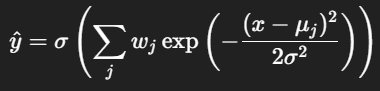



4. Define loss function with regularization:

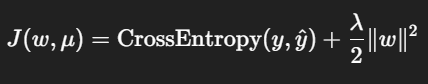



5. Update weights (w) using gradient descent (same as logistic regression).

6. Update centers (µ) using gradient descent too:

* Compute the derivative of the loss wrt µ.
* Shift µ towards regions of input space where it improves prediction.

7. Repeat until convergence.

**Interpretation:**

The model learns not only how strong each basis function is (weights) but also where the Gaussians should be placed in feature space.

This makes the basis functions data-driven rather than fixed.

### (j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution? Explain your answer.

The algorithm that learns both the weights
𝑤 and the centers
𝜇 using gradient descent does converge, but the type of solution depends on which parameters we are optimizing:

* **When centers 𝜇 are fixed:** optimizing the weights
𝑤 with L2 regularization is a convex problem. Gradient descent is guaranteed to converge to the global optimum.

* **When centers 𝜇 are also updated:** the optimization problem becomes non-convex. In this case, gradient descent will still converge, but only to a local optimum. The final solution depends on the initial placement of the centers 𝜇.

**Conclusion**: The algorithm does converge, but it generally finds a locally optimal solution, not a globally optimal one. Different initializations of
𝜇 may lead to different results.

# **Question 2**


> Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.
Note: You should not show your lab practices for this question.



### Linear Regression

In [ ]:
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Correlation with quality
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Slope: 0.36231469352113377
Intercept: 1.849294204459948
R^2 Score: 0.23561797203963397
MAE: 0.5749664687393711
RMSE: 0.706773042831321


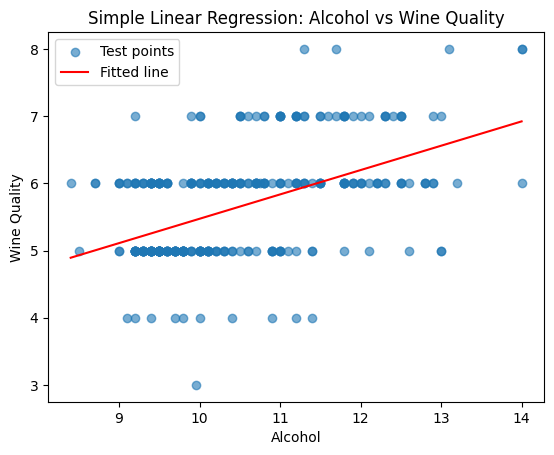

In [ ]:
# SIMPLE LINEAR REGRESSION (Wine Quality vs Alcohol)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Select one feature (Alcohol)
X = df[['alcohol']].values
y = df['quality'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Slope:", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

# Visualization
plt.scatter(X_test, y_test, alpha=0.6, label="Test points")
x_line = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1, 1)
plt.plot(x_line, lr.predict(x_line), 'r', label="Fitted line")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.title("Simple Linear Regression: Alcohol vs Wine Quality")
plt.legend()
plt.show()


Intercept: 5.623924941360438
            Feature  Coefficient
0           alcohol     0.327014
1  volatile acidity    -0.207569
2         sulphates     0.108490
MSE: 0.4005775807750832
RMSE: 0.6329119850145699
MAE: 0.519991394386857
R^2 Score: 0.387032916341121


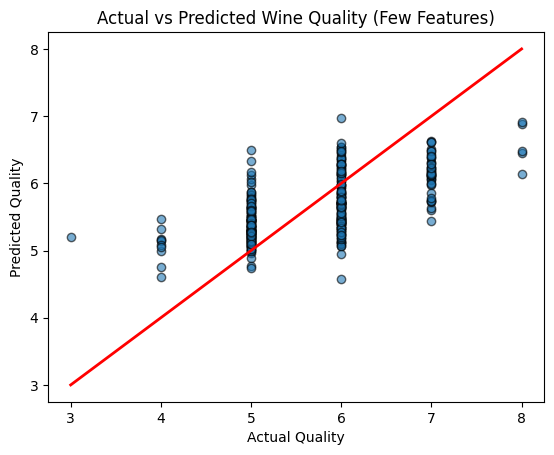

In [ ]:
# MULTILINEAR REGRESSION (Wine Quality with selected features)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Select only a few important features
selected_features = ['alcohol', 'volatile acidity', 'sulphates']
X = df[selected_features]
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Coefficients
print("Intercept:", lr.intercept_)
coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": lr.coef_
})
print(coef_df)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Visualization: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (Few Features)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)
plt.show()


### Logistic Regression

Intercept: -10.664942334226966

Coefficients:
                 Feature  Coefficient
0          fixed acidity     0.055273
1       volatile acidity    -2.175912
2            citric acid     0.417257
3         residual sugar     0.080036
4              chlorides    -0.923927
5    free sulfur dioxide     0.029366
6   total sulfur dioxide    -0.025307
7                density    -0.003900
8                     pH    -0.804134
9              sulphates     2.340019
10               alcohol     0.983649

Confusion Matrix:
 [[272   5]
 [ 29  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.74      0.33      0.45        43

    accuracy                           0.89       320
   macro avg       0.82      0.65      0.70       320
weighted avg       0.88      0.89      0.88       320

Accuracy Score: 0.89375


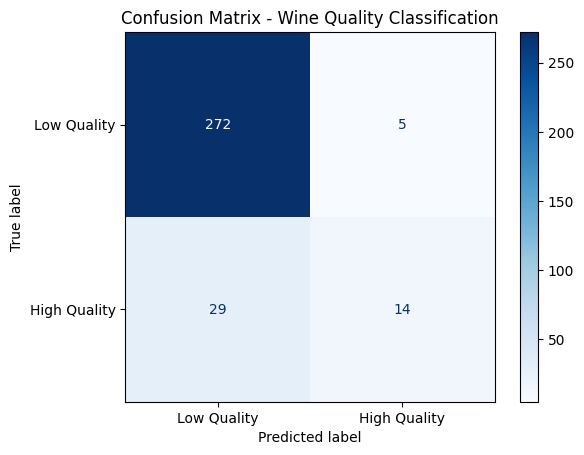

In [ ]:
# Logistic Regression on Wine Quality (Binary Classification)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1) Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# 2) Convert to binary target: quality ≥ 7 → "High Quality" (1), else "Low Quality" (0)
df['HighQuality'] = (df['quality'] >= 7).astype(int)

# 3) Features and target
features = df.columns.drop(['quality', 'HighQuality']).tolist()
X = df[features]
y = df['HighQuality']

# 4) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5) Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 6) Prediction
y_pred = log_reg.predict(X_test)

# 7) Model coefficients
print("Intercept:", log_reg.intercept_[0])
coef_df = pd.DataFrame({"Feature": features, "Coefficient": log_reg.coef_[0]})
print("\nCoefficients:")
print(coef_df)

# 8) Evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 9) Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    display_labels=["Low Quality", "High Quality"],
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix - Wine Quality Classification")
plt.show()
